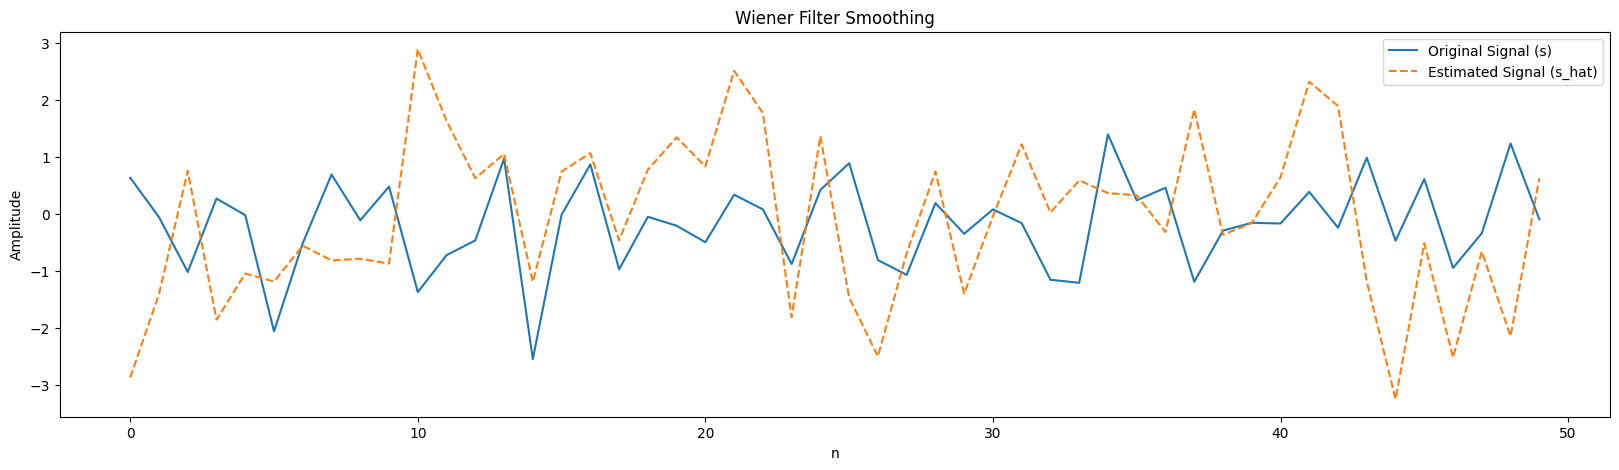

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz

N = 5000
sigma_s = 1
sigma_w = 0.5

s = np.random.normal(0, sigma_s, N)

w = np.random.normal(0, sigma_w, N)

x = s + w

Rss = np.correlate(s, s, mode='full') / N
Rss = Rss[N-1:]

Rww = np.correlate(w, w, mode='full') / N
Rww = Rww[N-1:]

# Compute Wiener filter estimate: s_hat = Rss * (Rss + Rww)^-1 * Rss
#Rss_matrix = np.diag(Rss[:5000])
#Rww_matrix = np.diag(Rww[:5000])

Rss_matrix = toeplitz(Rss[:5000])
Rww_matrix = toeplitz(Rww[:5000])

# Wiener filter calculation
W = Rss_matrix @ np.linalg.inv(Rss_matrix + Rww_matrix) @ Rss_matrix

# Apply Wiener filter
s_hat = np.convolve(x, W[0, :], mode='same')

graph_length = 50
# Plot results
plt.figure(figsize=(20, 5))
plt.plot(s[:graph_length], label='Original Signal (s)')
plt.plot(s_hat[:graph_length], label='Estimated Signal (s_hat)', linestyle='dashed')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Wiener Filter Smoothing')
plt.legend()
plt.show()
